In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt,glob, os
import warnings
import time
from PIL import Image

warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True

In [6]:
save_folder = 'images/KAM'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

def KAM_Twist_Map(eps):
    np.random.seed(2)
    plt.close('all')

    plt.figure(1,figsize=(10,10))

    for eloop in range(0,50):
        rlast = np.pi*(1.5*np.random.random()-0.5)
        thlast = 2*np.pi*np.random.random()
        orbit = np.int(200*(rlast+np.pi/2))
        rplot = np.zeros(shape=(orbit,))
        thetaplot = np.zeros(shape=(orbit,))
        x = np.zeros(shape=(orbit,))
        y = np.zeros(shape=(orbit,))    
        for loop in range(0,orbit):
            rnew = rlast + eps*np.sin(thlast)
            thnew = np.mod(thlast+rnew,2*np.pi)
            rplot[loop] = rnew
            thetaplot[loop] = np.mod(thnew-np.pi,2*np.pi) - np.pi            
            rlast = rnew
            thlast = thnew
            x[loop] = (rnew+np.pi+0.25)*np.cos(thnew)
            y[loop] = (rnew+np.pi+0.25)*np.sin(thnew)
        plt.plot(x,y,'o',ms=1)
        plt.title(r'$ \varepsilon=$'+str(eps),fontsize=30)
    #plt.savefig(r'KAM epsilon = {}.jpg'.format(eps),dpi=100)
    plt.savefig('{}/{:02f}.png'.format(save_folder, eps), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()
    plt.show()    

#eps = [0.2,0.5,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]
eps=np.arange(0.01,1.1,0.01)
for ep in eps:
    KAM_Twist_Map(ep)

In [25]:
first_last = 1 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms
durations = 150
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images/animated-kam-attractor.gif'

gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
import IPython.display as IPdisplay
Image.open(gif_filepath).n_frames == len(images) 
True
IPdisplay.Image(url=gif_filepath)

In [16]:
save_folder = 'images/Lozi'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
def Lozi_map(B,C,j):
    np.random.seed(2)
    plt.figure(1,figsize=(8,8))
    for eloop in range(0,100):
        xlast = np.random.normal(0,1,1)
        ylast = np.random.normal(0,1,1)
        xnew = np.zeros(shape=(500,))
        ynew = np.zeros(shape=(500,))
        for loop in range(0,500):
            xnew[loop] = 1 + ylast - C*abs(xlast)
            ynew[loop] = B*xlast
            xlast = xnew[loop]
            ylast = ynew[loop]
            
        plt.plot(np.real(xnew),np.real(ynew),'o',ms=1)
        plt.title('Lozi B:{},C:{}'.format(B,C.round(2)),fontsize=30)
        plt.xlim(xmin=-1.25,xmax=2)
        plt.ylim(ymin=-2,ymax=1.25)
    plt.savefig('{}/{}.png'.format(save_folder,j), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()
    
D=np.arange(-1.5,1.5,0.01)
E=np.arange(0,300,1)
for i,j in zip(D,E):
    i=i.round(2)
    Lozi_map(B = -1,C = i,j=j)

In [21]:
images = [Image.open(image) for image in glob.glob('{}/*.png'.format('images/Lozi'))]
gif_filepath = 'images/animated-lozi-attractor.gif'

gif = images[0]
gif.info['duration'] = 150 #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[0:])
import IPython.display as IPdisplay
Image.open(gif_filepath).n_frames == len(images) 

IPdisplay.Image(url=gif_filepath)

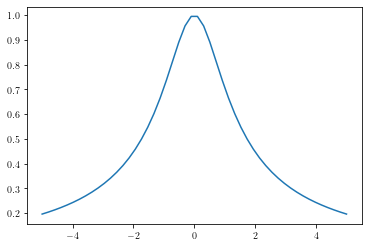

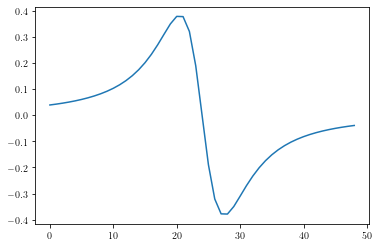

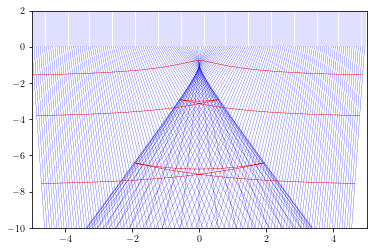

In [5]:
def refindex(x):
    n = n0/(1 + abs(x)**expon)**(1/expon);
    return n


delt = 0.001
Ly = 10
Lx = 5
n0 = 1
expon = 2   # adjust this from 1 to 10


delx = 0.01
rng = np.int(Lx/delx)
x = delx*np.linspace(-rng,rng)

n = refindex(x)

dndx = np.diff(n)/np.diff(x)

plt.figure(1)
lines = plt.plot(x,n)

plt.figure(2)
lines2 = plt.plot(dndx)

plt.figure(3)
plt.xlim(-Lx, Lx)
plt.ylim(-Ly, 2)
Nloop = 160;
xd = np.zeros((Nloop,3))
yd = np.zeros((Nloop,3))
for loop in range(0,Nloop):
    xp = -Lx + 2*Lx*(loop/Nloop)
    plt.plot([xp, xp],[2, 0],'b',linewidth = 0.25)

    thet = (refindex(xp+delt) - refindex(xp-delt))/(2*delt)
    xb = xp + np.tan(thet)*Ly
    plt.plot([xp, xb],[0, -Ly],'b',linewidth = 0.25)
    
    for sloop in range(0,3):
        delay = n0/(1 + abs(xp)**expon)**(1/expon) - n0
        dis = 0.75*(sloop+1)**2 - delay
        xfront = xp + np.sin(thet)*dis
        yfront = -dis*np.cos(thet)
                
        xd[loop,sloop] = xfront
        yd[loop,sloop] = yfront
        
for sloop in range(0,3):
    plt.plot(xd[:,sloop],yd[:,sloop],'r',linewidth = 0.5)

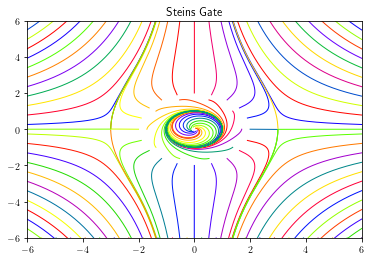

In [13]:
def solve_flow(param,lim = [-6,6,-6,6],max_time=20.0):

    def flow_deriv(x_y, t0, alpha, beta, gamma):
        #"""Compute the time-derivative ."""
        x, y = x_y
        
        w = 1
        R2 = x**2 + y**2
        R = np.sqrt(R2)
        arg = (R-2)/0.1
        env1 = 1/(1+np.exp(arg))
        env2 = 1 - env1
        
        f = env2*(x*(1/(R-1.99)**2 + 1e-2) - x) + env1*(w*y + w*x*(1 - R))
        g = env2*(y*(1/(R-1.99)**2 + 1e-2) + y) + env1*(-w*x + w*y*(1 - R))
        
        return [f,g]
    model_title = 'Steins Gate'

    plt.figure()
    xmin = lim[0]
    xmax = lim[1]
    ymin = lim[2]
    ymax = lim[3]
    plt.axis([xmin, xmax, ymin, ymax])

    N = 24*4 + 47
    x0 = np.zeros(shape=(N,2))
    ind = -1
    for i in range(0,24):
        ind = ind + 1
        x0[ind,0] = xmin + (xmax-xmin)*i/23
        x0[ind,1] = ymin
        ind = ind + 1
        x0[ind,0] = xmin + (xmax-xmin)*i/23
        x0[ind,1] = ymax
        ind = ind + 1
        x0[ind,0] = xmin
        x0[ind,1] = ymin + (ymax-ymin)*i/23
        ind = ind + 1
        x0[ind,0] = xmax
        x0[ind,1] = ymin + (ymax-ymin)*i/23
    ind = ind + 1
    x0[ind,0] = 0.05
    x0[ind,1] = 0.05
    
    for thetloop in range(0,10):
        ind = ind + 1
        theta = 2*np.pi*(thetloop)/10
        ys = 0.125*np.sin(theta)
        xs = 0.125*np.cos(theta)
        x0[ind,0] = xs
        x0[ind,1] = ys

    for thetloop in range(0,10):
        ind = ind + 1
        theta = 2*np.pi*(thetloop)/10
        ys = 1.7*np.sin(theta)
        xs = 1.7*np.cos(theta)
        x0[ind,0] = xs
        x0[ind,1] = ys

    for thetloop in range(0,20):
        ind = ind + 1
        theta = 2*np.pi*(thetloop)/20
        ys = 2*np.sin(theta)
        xs = 2*np.cos(theta)
        x0[ind,0] = xs
        x0[ind,1] = ys
        
    ind = ind + 1
    x0[ind,0] = -3
    x0[ind,1] = 0.05
    ind = ind + 1
    x0[ind,0] = -3
    x0[ind,1] = -0.05
    ind = ind + 1
    x0[ind,0] = 3
    x0[ind,1] = 0.05
    ind = ind + 1
    x0[ind,0] = 3
    x0[ind,1] = -0.05
    ind = ind + 1
    x0[ind,0] = -6
    x0[ind,1] = 0.00
    ind = ind + 1
    x0[ind,0] = 6
    x0[ind,1] = 0.00
           
    colors = plt.cm.prism(np.linspace(0, 1, N))
                        
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(flow_deriv, x0i, t, param)
                      for x0i in x0])
    plt.title(model_title)
    for i in range(N):
        x, y = x_t[i,:,:].T
        lines = plt.plot(x, y, '-', c=colors[i])
        plt.setp(lines, linewidth=1)
    plt.savefig('steins gate.jpg',dpi=600)   
    plt.show()
    
        
    return t, x_t

param = (0.02,0.5,0.2)        # Steins Gate
lim = (-6,6,-6,6)

t, x_t = solve_flow(param,lim)

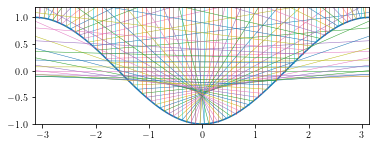

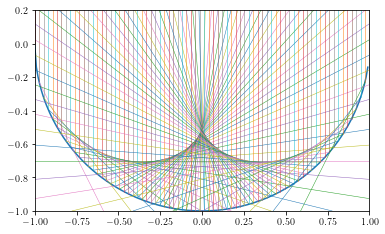

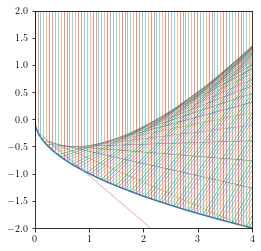

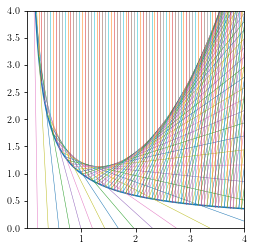

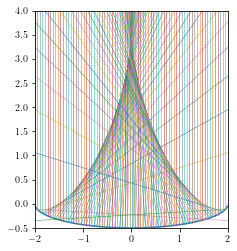

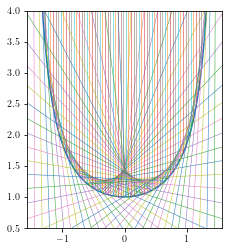

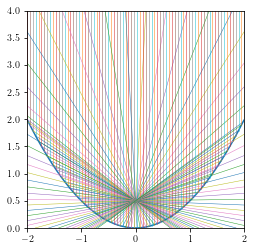

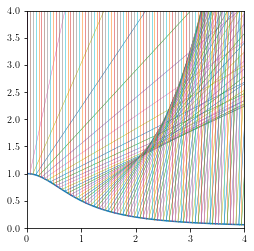

In [7]:
# model_case 1 = cosine
# model_case 2 = circle
# model_case 3 = square root
# model_case 4 = inverse power law
# model_case 5 = ellipse
# model_case 6 = secant
# model_case 7 = parabola
# model_case 8 = Cauchy

# model_case = int(input('Input Model Case (1-7)'))
def Model(model_case):
    
    if model_case == 1:
        model_title = 'cosine'
        xleft = -np.pi
        xright = np.pi
        ybottom = -1
        ytop = 1.2

    elif model_case == 2:
        model_title = 'circle'
        xleft = -1
        xright = 1
        ybottom = -1
        ytop = .2

    elif model_case == 3:
        model_title = 'square-root'
        xleft = 0
        xright = 4
        ybottom = -2
        ytop = 2

    elif model_case == 4:
        model_title = 'Inverse Power Law'
        xleft = 1e-6
        xright = 4
        ybottom = 0
        ytop = 4
    
    elif model_case == 5:
        model_title = 'ellipse'
        a = 0.5
        b = 2
        xleft = -b
        xright = b
        ybottom = -a
        ytop = 0.5*b**2/a
    
    elif model_case == 6:
        model_title = 'secant'
        xleft = -np.pi/2
        xright = np.pi/2
        ybottom = 0.5
        ytop = 4
    
    elif model_case == 7:
        model_title = 'Parabola'
        xleft = -2
        xright = 2
        ybottom = 0
        ytop = 4

    elif model_case == 8:
        model_title = 'Cauchy'
        xleft = 0
        xright = 4
        ybottom = 0
        ytop = 4
    
    def feval(x):

        if model_case == 1:
            y = -np.cos(x)

        elif model_case == 2:
            y = -np.sqrt(1-x**2)

        elif model_case == 3:
            y = -np.sqrt(x)
        
        elif model_case == 4:
            y = x**(-0.75)
        
        elif model_case == 5:
            y = -a*np.sqrt(1-x**2/b**2)

        elif model_case == 6:
            y = 1.0/np.cos(x)

        elif model_case == 7:
            y = 0.5*x**2  
        
        elif model_case == 8:
            y = 1/(1 + x**2)

        return y

    xx = np.arange(xleft,xright,0.01)
    yy = feval(xx)

    lines = plt.plot(xx,yy)
    plt.xlim(xleft, xright)
    plt.ylim(ybottom, ytop)

    delx = 0.001
    N = 75

    for i in range(N+1):
    
        x = xleft + (xright-xleft)*(i-1)/N
    
        val = feval(x)
        valp = feval(x+delx/2)
        valm = feval(x-delx/2)
        deriv = (valp-valm)/delx
    
        phi = np.arctan(deriv)
        slope =  np.tan(np.pi/2 + 2*phi)

        if np.abs(deriv) < 1:
            xf = (ytop-val+slope*x)/slope;
            yf = ytop;
        else:
            xf = (ybottom-val+slope*x)/slope;
            yf = ybottom;
        plt.plot([x, x],[ytop, val],linewidth = 0.5)       
        plt.plot([x, xf],[val, yf],linewidth = 0.5)
        plt.gca().set_aspect('equal', adjustable='box')       
    plt.show()
    
for model_case in range(1,9,1):
    Model(model_case)

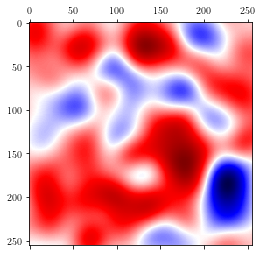

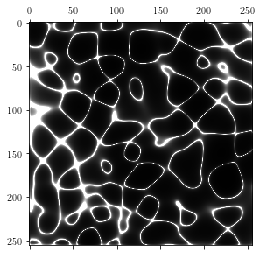

(64.0, 192.0)

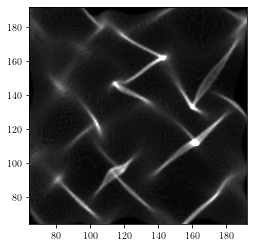

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
from scipy import signal as signal

plt.close('all')

N = 256

def gauss2(sy,sx,wy,wx):
    
    x = np.arange(-sx/2,sy/2,1)
    y = np.arange(-sy/2,sy/2,1)
    y = y[..., None]
    
    ex = np.ones(shape=(sy,1))
    x2 = np.kron(ex,x**2/(2*wx**2));
    
    ey = np.ones(shape=(1,sx));
    y2 = np.kron(y**2/(2*wy**2),ey);

    rad2 = (x2+y2);

    A = np.exp(-rad2);

    return A

def speckle2(sy,sx,wy,wx):

    Btemp = 2*np.pi*rnd.rand(sy,sx);
    B = np.exp(complex(0,1)*Btemp);

    C = gauss2(sy,sx,wy,wx);

    Atemp = signal.convolve2d(B,C,'same');

    Intens = np.mean(np.mean(np.abs(Atemp)**2));

    D = np.real(Atemp/np.sqrt(Intens));

    Dphs = np.arctan2(np.imag(D),np.real(D));

    return D, Dphs


Sp, Sphs = speckle2(N,N,N/16,N/16)

plt.figure(2)
plt.matshow(Sp,2,cmap=plt.cm.get_cmap('seismic'))  # hsv, seismic, bwr
plt.show()

fx, fy = np.gradient(Sp);

fxx,fxy = np.gradient(fx);
fyx,fyy = np.gradient(fy);

J = fxx*fyy - fxy*fyx;

D = np.abs(1/J)

plt.figure(3)
plt.matshow(D,3,cmap=plt.cm.get_cmap('gray'))  # hsv, seismic, bwr
plt.clim(0,0.5e7)
plt.show()

eps = 1e-7
cnt = 0
E = np.zeros(shape=(N,N))
for yloop in range(0,N-1):
    for xloop in range(0,N-1):
        
        d = N/2
        
        indx = int(N/2 + (d*(fx[yloop,xloop])+(xloop-N/2)/2))
        indy = int(N/2 + (d*(fy[yloop,xloop])+(yloop-N/2)/2))
        
        if ((indx > 0) and (indx < N)) and ((indy > 0) and (indy < N)):
            E[indy,indx] = E[indy,indx] + 1

plt.figure(4)
plt.imshow(E,interpolation='bicubic',cmap=plt.cm.get_cmap('gray'))
plt.clim(0,30)
plt.xlim(N/4, 3*N/4)
plt.ylim(N/4,3*N/4)

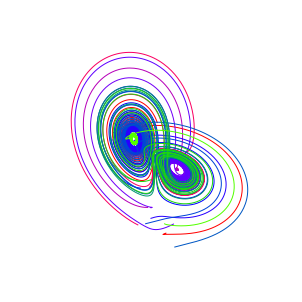

[None, None, None]

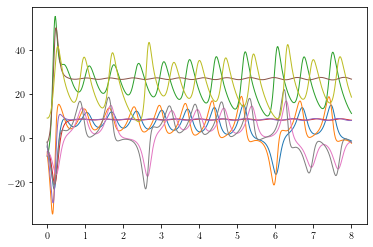

In [9]:
import numpy as np
import matplotlib as mpl

import matplotlib.colors as colors
import matplotlib.cm as cmx

from scipy import integrate
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

plt.close('all')

jet = cm = plt.get_cmap('jet') 
values = range(10)
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

def solve_lorenz(N=12, angle=0.0, max_time=8.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -10 + 20 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(500*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    # colors = plt.cm.viridis(np.linspace(0, 1, N))
    # colors = plt.cm.rainbow(np.linspace(0, 1, N))
    # colors = plt.cm.spectral(np.linspace(0, 1, N))
    colors = plt.cm.prism(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=1)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t


t, x_t = solve_lorenz(angle=0, N=12)

plt.figure(2)
lines = plt.plot(t,x_t[1,:,0],t,x_t[1,:,1],t,x_t[1,:,2])
plt.setp(lines, linewidth=1)
lines = plt.plot(t,x_t[2,:,0],t,x_t[2,:,1],t,x_t[2,:,2])
plt.setp(lines, linewidth=1)
lines = plt.plot(t,x_t[10,:,0],t,x_t[10,:,1],t,x_t[10,:,2])
plt.setp(lines, linewidth=1)

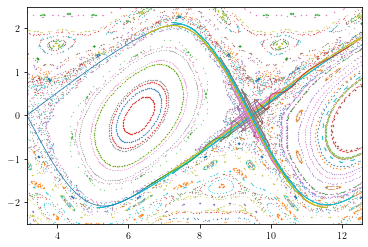

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA

plt.close('all')

eps = 0.97

np.random.seed(2)

plt.figure(1)

for eloop in range(0,100):

    rlast = 2*np.pi*(0.5-np.random.random())
    thlast = 4*np.pi*np.random.random()
    
    rplot = np.zeros(shape=(200,))
    thetaplot = np.zeros(shape=(200,))
    for loop in range(0,200):
        rnew = rlast + eps*np.sin(thlast)
        thnew = np.mod(thlast+rnew,4*np.pi)
        
        thetaplot[loop] = np.mod(thnew-np.pi,4*np.pi)     
        rtemp = np.mod(rnew + np.pi,2*np.pi)
        rplot[loop] = rtemp - np.pi
  
        rlast = rnew
        thlast = thnew
        
    plt.plot(np.real(thetaplot),np.real(rplot),'o',ms=0.2)
    plt.xlim(xmin=np.pi,xmax=4*np.pi)
    plt.ylim(ymin=-2.5,ymax=2.5)
        
plt.savefig('StandMap')

K = eps
eps0 = 5e-7

J = [[1,1+K],[1,1]]
w, v = LA.eig(J)

My = w[0]
Vu = v[:,0]     # unstable manifold
Vs = v[:,1]     # stable manifold

# Plot the unstable manifold
Hr = np.zeros(shape=(100,150))
Ht = np.zeros(shape=(100,150))
for eloop in range(0,100):
    
    eps = eps0*eloop

    roldu1 = eps*Vu[0]
    thetoldu1 = eps*Vu[1]
    
    Nloop = np.ceil(-6*np.log(eps0)/np.log(eloop+2))
    flag = 1
    cnt = 0
    
    while flag==1 and cnt < Nloop:
        
        ru1 = roldu1 + K*np.sin(thetoldu1)
        thetau1 = thetoldu1 + ru1
        
        roldu1 = ru1
        thetoldu1 = thetau1
        
        if thetau1 > 4*np.pi:
            flag = 0
            
        Hr[eloop,cnt] = roldu1
        Ht[eloop,cnt] = thetoldu1 + 3*np.pi
        cnt = cnt+1
    
x = Ht[0:99,12] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[0:99,12]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

del x,y
x = Ht[5:39,15] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[5:39,15]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

del x,y
x = Ht[12:69,16] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[12:69,16]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

del x,y
x = Ht[15:89,17] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[15:89,17]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

del x,y
x = Ht[30:99,18] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[30:99,18]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

# Plot the stable manifold
del Hr, Ht
Hr = np.zeros(shape=(100,150))
Ht = np.zeros(shape=(100,150))
#eps0 = 0.03
for eloop in range(0,100):
    
    eps = eps0*eloop

    roldu1 = eps*Vs[0]
    thetoldu1 = eps*Vs[1]
    
    Nloop = np.ceil(-6*np.log(eps0)/np.log(eloop+2))
    flag = 1
    cnt = 0
    
    while flag==1 and cnt < Nloop:
        
        thetau1 = thetoldu1 - roldu1
        ru1 = roldu1 - K*np.sin(thetau1)

        roldu1 = ru1
        thetoldu1 = thetau1
        
        if thetau1 > 4*np.pi:
            flag = 0
            
        Hr[eloop,cnt] = roldu1
        Ht[eloop,cnt] = thetoldu1
        cnt = cnt+1
    
x = Ht[0:79,12] + np.pi
x2 = 6*np.pi - x
y = Hr[0:79,12]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

del x,y
x = Ht[4:39,15] + np.pi
x2 = 6*np.pi - x
y = Hr[4:39,15]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

del x,y
x = Ht[12:69,16] + np.pi
x2 =  6*np.pi - x
y = Hr[12:69,16]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

del x,y
x = Ht[15:89,17] + np.pi
x2 =  6*np.pi - x
y = Hr[15:89,17]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

del x,y
x = Ht[30:99,18] + np.pi
x2 =  6*np.pi - x
y = Hr[30:99,18]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
plt.savefig('traj.jpg',dpi=600)

 
SIRS.py
beta =  0.3
mu =  0.2
nu = 0.02
betap/mu =  1.4999999999999998


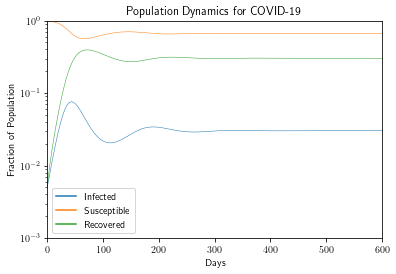

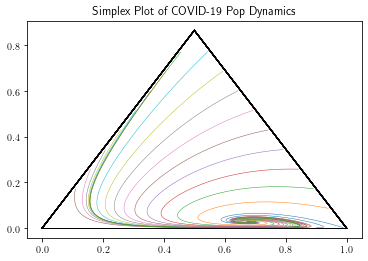

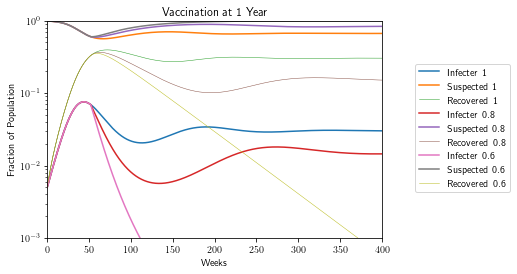

In [15]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

plt.close('all')

def tripartite(x,y,z):

    sm = x + y + z
    xp = x/sm
    yp = y/sm
    
    f = np.sqrt(3)/2
    
    y0 = f*xp
    x0 = -0.5*xp - yp + 1;
    
    lines = plt.plot(x0,y0)
    plt.setp(lines, linewidth=0.5)
    plt.plot([0, 1],[0, 0],'k',linewidth=1)
    plt.plot([0, 0.5],[0, f],'k',linewidth=1)
    plt.plot([1, 0.5],[0, f],'k',linewidth=1)
plt.show()

print(' ')
print('SIRS.py')

def solve_flow(param,max_time=1000.0):

    def flow_deriv(x_y,tspan,mu,betap,nu):
        x, y = x_y
        
        return [-mu*x + betap*x*(1-x-y),mu*x-nu*y]
    
    x0 = [del1, del2]
    
    # Solve for the trajectories
    t = np.linspace(0, int(tlim), int(250*tlim))
    x_t = integrate.odeint(flow_deriv, x0, t, param)

    return t, x_t

 # rates per week
betap = 0.3;   # infection rate
mu = 0.2;      # recovery rate
nu = 0.02      # immunity decay rate

print('beta = ',betap)
print('mu = ',mu)
print('nu =',nu)
print('betap/mu = ',betap/mu)
          
del1 = 0.005         # initial infected
del2 = 0.005         # recovered

tlim = 600          # weeks (about 12 years)

param = (mu, betap, nu)    # flow parameters

t, y = solve_flow(param)
I = y[:,0]
R = y[:,1]
S = 1 - I - R

plt.figure(1)
lines = plt.semilogy(t,I,t,S,t,R)
plt.ylim([0.001,1])
plt.xlim([0,tlim])
plt.legend(('Infected','Susceptible','Recovered'))
plt.setp(lines, linewidth=0.5)
plt.xlabel('Days')
plt.ylabel('Fraction of Population')
plt.title('Population Dynamics for COVID-19')
plt.show()

plt.figure(2)
#plt.hold(True)
for xloop in range(0,10):
    del1 = xloop/10.1 + 0.001
    del2 = 0.01

    tlim = 300
    param = (mu, betap, nu)    # flow parameters
    t, y = solve_flow(param)       
    I = y[:,0]
    R = y[:,1]
    S = 1 - I - R
    
    tripartite(I,R,S);

for yloop in range(1,6):
    del1 = 0.001;
    del2 = yloop/10.1
    t, y = solve_flow(param)
    I = y[:,0]
    R = y[:,1]
    S = 1 - I - R
    
    tripartite(I,R,S);
    
for loop in range(2,10):
    del1 = loop/10.1
    del2 = 1 - del1 - 0.01
    t, y = solve_flow(param)
    I = y[:,0]
    R = y[:,1]
    S = 1 - I - R
        
    tripartite(I,R,S);
    
#plt.hold(False)
plt.title('Simplex Plot of COVID-19 Pop Dynamics')
c=['r','g','b'] 
vac = [1, 0.8, 0.6]
lbl=['Infected','Susceptible','Recovered']
for l in range(0,len(vac)):
    loop=vac[l] 
    # Run the epidemic to the first peak
    del1 = 0.005
    del2 = 0.005
    tlim = 52
    param = (mu, betap, nu)
    t1, y1 = solve_flow(param)
    
    # Now vaccinate a fraction of the population
    st = np.size(t1)
    del1 = y1[st-1,0]
    del2 = y1[st-1,1]
    tlim = 400
    
    param = (mu, loop*betap, nu)
    t2, y2 = solve_flow(param)
    
    t2 = t2 + t1[st-1]
    
    tc = np.concatenate((t1,t2))
    yc = np.concatenate((y1,y2))
    
    I = yc[:,0]
    R = yc[:,1]
    S = 1 - I - R
    
    
    plt.figure(3)
    #plt.hold(True)
    axes = plt.semilogy(tc,I,label='Infecter   '+str(loop))
    axes = plt.semilogy(tc,S,label='Suspected  '+str(loop))
    axes = plt.semilogy(tc,R,label='Recovered  '+str(loop))
    plt.ylim([0.001,1])
    plt.xlim([0,tlim])
    
    plt.setp(axes, linewidth=0.5)
    plt.xlabel('Weeks')
    plt.ylabel('Fraction of Population')
    plt.title('Vaccination at 1 Year')
    plt.legend(loc=(1.1,0.21))
plt.savefig('pathplot.jpg',dpi=600)
plt.show()
    
#plt.hold(False)

 
SIRWave.py


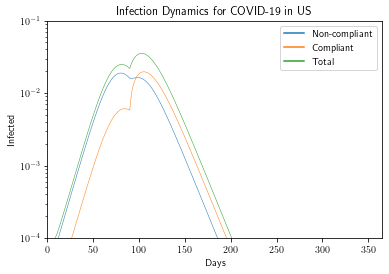

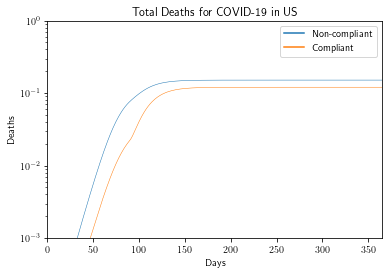

Deaths =  0.27187165029460936


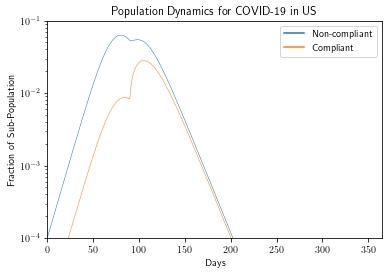

In [12]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

plt.close('all')

print(' ')
print('SIRWave.py')

def solve_flow(param,max_time=1000.0):

    def flow_deriv(x_y_z_w,tspan):
        In, Sn, Iq, Sq = x_y_z_w
        
        Inp = -mu*In + beta*knn*In*Sn + beta*knq*Iq*Sn
        Snp = -beta*knn*In*Sn - beta*knq*Iq*Sn
        
        Iqp = -mu*Iq + beta*kqn*In*Sq + beta*kqq*Iq*Sq
        Sqp = -beta*kqn*In*Sq - beta*kqq*Iq*Sq
        
        return [Inp, Snp, Iqp, Sqp]
    
    x0 = [In0, Sn0, Iq0, Sq0]
    
    # Solve for the trajectories
    t = np.linspace(tlo, thi, thi-tlo)
    x_t = integrate.odeint(flow_deriv, x0, t)

    return t, x_t

beta = 0.02   # infection rate
dill = 5      # mean days infectious
mu = 1/dill   # decay rate
fnq = 0.3     # fraction not quarantining
fq = 1-fnq    # fraction quarantining
P = 330       # Population of the US in millions
mr = 0.002    # Mortality rate
dq = 90       # Days of lock-down (this is the key parameter)

# During quarantine
knn = 50      # Average connections per day for non-compliant group among themselves
kqq = 0       # Connections among compliant group
knq = 0       # Effect of compliaht group on non-compliant
kqn = 5       # Effect of non-clmpliant group on compliant

initfrac = 0.0001          # Initial conditions:
In0 = initfrac*fnq         # infected non-compliant
Sn0 = (1-initfrac)*fnq     # susceptible non-compliant
Iq0 = initfrac*fq          # infected compliant
Sq0 = (1-initfrac)*fq      # susceptivle compliant

tlo = 0
thi = dq

param = (mu, beta, knn, knq, kqn, kqq)    # flow parameters

t1, y1 = solve_flow(param)

In1 = y1[:,0]
Sn1 = y1[:,1]
Rn1 = fnq - In1 - Sn1
Iq1 = y1[:,2]
Sq1 = y1[:,3]
Rq1 = fq - Iq1 - Sq1

# Lift the quarantine: Compliant group continues social distancing
knn = 50      # Adjusted coupling parameters
kqq = 5
knq = 20
kqn = 15

fin1 = len(t1)
In0 = In1[fin1-1]
Sn0 = Sn1[fin1-1]
Iq0 = Iq1[fin1-1]
Sq0 = Sq1[fin1-1]

tlo = fin1
thi = fin1 + 365-dq

param = (mu, beta, knn, knq, kqn, kqq)

t2, y2 = solve_flow(param)

In2 = y2[:,0]
Sn2 = y2[:,1]
Rn2 = fnq - In2 - Sn2
Iq2 = y2[:,2]
Sq2 = y2[:,3]
Rq2 = fq - Iq2 - Sq2

fin2 = len(t2)
t = np.zeros(shape=(fin1+fin2,))
In = np.zeros(shape=(fin1+fin2,))
Sn = np.zeros(shape=(fin1+fin2,))
Rn = np.zeros(shape=(fin1+fin2,))
Iq = np.zeros(shape=(fin1+fin2,))
Sq = np.zeros(shape=(fin1+fin2,))
Rq = np.zeros(shape=(fin1+fin2,))

t[0:fin1] = t1
In[0:fin1] = In1
Sn[0:fin1] = Sn1
Rn[0:fin1] = Rn1
Iq[0:fin1] = Iq1
Sq[0:fin1] = Sq1
Rq[0:fin1] = Rq1

t[fin1:fin1+fin2] = t2
In[fin1:fin1+fin2] = In2
Sn[fin1:fin1+fin2] = Sn2
Rn[fin1:fin1+fin2] = Rn2
Iq[fin1:fin1+fin2] = Iq2
Sq[fin1:fin1+fin2] = Sq2
Rq[fin1:fin1+fin2] = Rq2

plt.figure(1)
lines = plt.semilogy(t,In,t,Iq,t,(In+Iq))
plt.ylim([0.0001,.1])
plt.xlim([0,thi])
plt.legend(('Non-compliant','Compliant','Total'))
plt.setp(lines, linewidth=0.5)
plt.xlabel('Days')
plt.ylabel('Infected')
plt.title('Infection Dynamics for COVID-19 in US')
plt.show()

plt.figure(2)
lines = plt.semilogy(t,Rn*P*mr,t,Rq*P*mr)
plt.ylim([0.001,1])
plt.xlim([0,thi])
plt.legend(('Non-compliant','Compliant'))
plt.setp(lines, linewidth=0.5)
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.title('Total Deaths for COVID-19 in US')
plt.show()

D = P*mr*(Rn[fin1+fin2-1] + Rq[fin1+fin2-1])
print('Deaths = ',D)

plt.figure(3)
lines = plt.semilogy(t,In/fnq,t,Iq/fq)
plt.ylim([0.0001,.1])
plt.xlim([0,thi])
plt.legend(('Non-compliant','Compliant'))
plt.setp(lines, linewidth=0.5)
plt.xlabel('Days')
plt.ylabel('Fraction of Sub-Population')
plt.title('Population Dynamics for COVID-19 in US')
plt.show()

SIR.py
beta =  0.10460124870560078
dinf =  10.460124870560078
beta/mu =  1.464417481878411


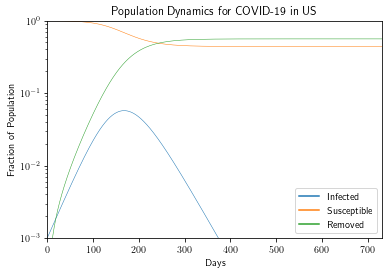

US Dead =  1.8953304141271496


In [ ]:
print('SIR.py')

def solve_flow(param,max_time=1000.0):

    def flow_deriv(x_y,tspan,mu,betap):
        x, y = x_y
        
        return [-mu*x + betap*x*y,-betap*x*y]
    
    x0 = [del1, del2]
    
    # Solve for the trajectories
    t = np.linspace(0, int(tlim), int(250*tlim))
    x_t = integrate.odeint(flow_deriv, x0, t, param)

   
    return t, x_t


r = 0.0002    # 0.0002
k = 50        # connections  50
dill = 14     # days ill 14
dpq = 14      # days shelter in place 14
fnq = 0.6     # fraction NOT sheltering in place
mr0 = 0.01    # mortality rate
mr1 = 0.03     # extra mortality rate if exceeding hospital capacity
P = 330       # population of US in Millions
HC = 0.003    # hospital capacity

dinf = fnq*dill + (1-fnq)*np.exp(-dpq/dill)*dill;

betap = r*k*dinf;
mu = 1/dill;

print('beta = ',betap)
print('dinf = ',dinf)
print('beta/mu = ',betap/mu)
          
del1 = .001         # infected
del2 = 1-del1       # susceptible

tlim = np.log(P*1e6/del1)/betap + 50/betap

param = (mu, betap)    # flow parameters

t, y = solve_flow(param)
I = y[:,0]
S = y[:,1]
R = 1 - I - S

plt.figure(1)
lines = plt.semilogy(t,I,t,S,t,R)
plt.ylim([0.001,1])
plt.xlim([0,tlim])
plt.legend(('Infected','Susceptible','Removed'))
plt.setp(lines, linewidth=0.5)
plt.xlabel('Days')
plt.ylabel('Fraction of Population')
plt.title('Population Dynamics for COVID-19 in US')
plt.show()

mr = mr0 + mr1*(0.2*np.max(I)-HC)*np.heaviside(0.2*np.max(I),HC)
Dead = mr*P*R[R.size-1]
print('US Dead = ',Dead)

D = np.zeros(shape=(100,))
x = np.zeros(shape=(100,))
for kloop in range(0,5):
    for floop in range(0,100):
        
        fnq = floop/100
        
        dinf = fnq*dill + (1-fnq)*np.exp(-dpq/dill)*dill;
        
        k = 20 + kloop*10
        betap = r*k*dinf
        
        tlim = np.log(P*1e6/del1)/betap + 50/betap

        param = (mu, betap)    # flow parameters

        t, y = solve_flow(param)       
        I = y[:,0]
        S = y[:,1]
        R = 1 - I - S
        
        mr = mr0 + mr1*(0.2*np.max(I)-HC)*np.heaviside(0.2*np.max(I),HC)

        D[floop] = mr*P*R[R.size-1]
        x[floop] = fnq
        
    plt.figure(2)
    lines2 = plt.plot(x,D)
    plt.setp(lines2, linewidth=0.5)

plt.ylabel('US Million Deaths')
plt.xlabel('Fraction NOT Quarantining')
plt.title('Quarantine and Distancing')        
plt.legend(('20','30','40','50','60','70'))
plt.show()    


label = np.zeros(shape=(9,))
for floop in range(0,8):
    
    fq = floop/10.0
    
    dinf = (1-fq)*dill + fq*np.exp(-dpq/dill)*dill;
    
    k = 50
    betap = r*k*dinf
    
    tlim = np.log(P*1e6/del1)/betap + 50/betap

    param = (mu, betap)    # flow parameters

    t, y = solve_flow(param)       
    I = y[:,0]
    S = y[:,1]
    R = 1 - I - S
    
    plt.figure(3)
    lines2 = plt.plot(t,I*P)
    plt.setp(lines2, linewidth=0.5)
    label[floop]=fq

plt.legend(label)
plt.ylabel('US Millions Infected')
plt.xlabel('Days')
plt.title('Flattening the Curve')  

 
trirep.py
Case: 1 = antisymm zero diagonal
Case: 2 = antisymm zero trace
Case: 3 = random
Enter the Model Case (1-3)3


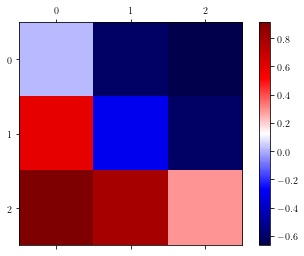

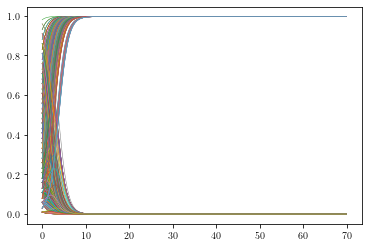

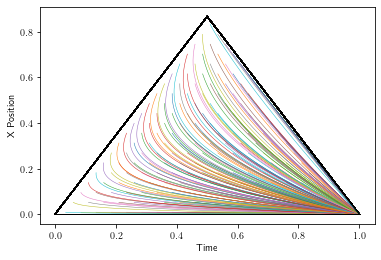

In [18]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

plt.close('all')

def tripartite(x,y,z):

    sm = x + y + z
    xp = x/sm
    yp = y/sm
    
    f = np.sqrt(3)/2
    
    y0 = f*xp
    x0 = -0.5*xp - yp + 1;
    
    plt.figure(2)
    lines = plt.plot(x0,y0)
    plt.setp(lines, linewidth=0.5)
    plt.plot([0, 1],[0, 0],'k',linewidth=1)
    plt.plot([0, 0.5],[0, f],'k',linewidth=1)
    plt.plot([1, 0.5],[0, f],'k',linewidth=1)
plt.show()
    

def solve_flow(y,tspan):
    def flow_deriv(y, t0):
    #"""Compute the time-derivative ."""
    
        f = np.zeros(shape=(N,))
        for iloop in range(N):
            ftemp = 0
            for jloop in range(N):
                ftemp = ftemp + A[iloop,jloop]*y[jloop]
            f[iloop] = ftemp
        
        phitemp = phi0          # Can adjust this from 0 to 1 to stabilize 
                                # (but Nth population is no longer independent)
        for loop in range(N):
            phitemp = phitemp + f[loop]*y[loop]
        phi = phitemp
        
        yd = np.zeros(shape=(N,))
        for loop in range(N-1):
            yd[loop] = y[loop]*(f[loop] - phi);
        
        if np.abs(phi0) < 0.01:             # average fitness maintained at zero
            yd[N-1] = y[N-1]*(f[N-1]-phi);
        else:                                     # non-zero average fitness
            ydtemp = 0
            for loop in range(N-1):
                ydtemp = ydtemp - yd[loop]
            yd[N-1] = ydtemp
       
        return yd

    # Solve for the trajectories
    t = np.linspace(0, tspan, 701)
    x_t = integrate.odeint(flow_deriv,y,t)
    return t, x_t

# model_case 1 = zero diagonal
# model_case 2 = zero trace
# model_case 3 = asymmetric (zero trace)
print(' ')
print('trirep.py')
print('Case: 1 = antisymm zero diagonal')
print('Case: 2 = antisymm zero trace')
print('Case: 3 = random')
model_case = int(input('Enter the Model Case (1-3)'))

N = 3
asymm = 3      
'''   1 = zero diag (replicator eqn)  
      2 = zero trace (autocatylitic model) 
      3 = random (but zero trace)
'''
phi0 = 0.001            # average fitness (positive number) damps oscillations
T = 100;


if model_case == 1:
    Atemp = np.zeros(shape=(N,N))
    for yloop in range(N):
        for xloop in range(yloop+1,N):
            Atemp[yloop,xloop] = 2*(0.5 - np.random.random(1))
            Atemp[xloop,yloop] = -Atemp[yloop,xloop]

if model_case == 2:
    Atemp = np.zeros(shape=(N,N))
    for yloop in range(N):
        for xloop in range(yloop+1,N):
            Atemp[yloop,xloop] = 2*(0.5 - np.random.random(1))
            Atemp[xloop,yloop] = -Atemp[yloop,xloop]
        Atemp[yloop,yloop] = 2*(0.5 - np.random.random(1))
    tr = np.trace(Atemp)
    A = Atemp
    for yloop in range(N):
        A[yloop,yloop] = Atemp[yloop,yloop] - tr/N
        
else:
    Atemp = np.zeros(shape=(N,N))
    for yloop in range(N):
        for xloop in range(N):
            Atemp[yloop,xloop] = 2*(0.5 - np.random.random(1))
        
    tr = np.trace(Atemp)
    A = Atemp
    for yloop in range(N):
        A[yloop,yloop] = Atemp[yloop,yloop] - tr/N

plt.figure(3)
im = plt.matshow(A,3,cmap=plt.cm.get_cmap('seismic'))  # hsv, seismic, bwr
cbar = im.figure.colorbar(im)

M = 20
delt = 1/M
ep = 0.01;

tempx = np.zeros(shape = (3,))
for xloop in range(M):
    tempx[0] = delt*(xloop)+ep;
    for yloop in range(M-xloop):
        tempx[1] = delt*yloop+ep
        tempx[2] = 1 - tempx[0] - tempx[1]
        
        x0 = tempx/np.sum(tempx);          # initial populations
        
        tspan = 70
        t, x_t = solve_flow(x0,tspan)
        
        y1 = x_t[:,0]
        y2 = x_t[:,1]
        y3 = x_t[:,2]
        
        plt.figure(1)
        lines = plt.plot(t,y1,t,y2,t,y3)
        plt.setp(lines, linewidth=0.5)
        tripartite(y1,y2,y3)
        plt.ylabel('X Position')
        plt.xlabel('Time')
plt.show()
        